<a href="https://colab.research.google.com/github/homerabbitsky/HelloAI/blob/main/assignment2_darkness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist
np.set_printoptions(linewidth=np.inf)
#retval = mnist.load_data()
#X_train = retval[0][0]
#Y_train = retval[0][1]
#X_test = retval[1][0]
#Y_test = retval[1][1]

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_train[0].shape)
print(Y_train[0].shape)
print(X_train[0])
print(Y_train[0])


(60000, 28, 28)
(60000,)
(28, 28)
()
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

In [7]:
# first twn images
images = X_train[0:10]

In [8]:
counts = [0]*10
for y in Y_train:
  counts[y] = counts[y]+1

print(counts)

#how many digits are in Y_train

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [2]:
#create function to calculate the darkness of a single image (only 28x28 images)

def calcDarkness(x):
  total = 0
  for r in range(28):
    for c in range(28):
      total = total + x[r][c]
  return total

In [9]:
#test our darkness function
print(calcDarkness(X_train[1]))

darknesses = [0]*10
#loop through all the training images
for x, y in zip(X_train, Y_train):
  darkness = calcDarkness(x)
  darknesses [y] = darknesses[y] + darkness

darkness = [darknesstotal/counts[i] for i, darknesstotal in enumerate(darknesses)]
print(darknesses)

31095
[205326677, 102435579, 177447756, 173474844, 141746835, 139534257, 162445377, 143445804, 175642245, 145799171]


In [12]:
#randomized code

import random
images = random.sample(list(X_train), 10)
for i in range(10):
    imgx = X_train[random.randint(0,len(X_train))]
    print(imgx)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 125 164 254 254 254 160  38   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 110 168 250 253 253 253 253 253 253 159  39   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  49 243 253 253 253 253 253 253 253 253 253  84   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9 236 253 253 164  42  19  53 227 253 253 137   0   

In [14]:
# setup the x-axis
digits = [f"{i}" for i in range(10)]
# list comprehension that creates the digits as strings so that they all show up on the x axis (updated to add the curly braces)

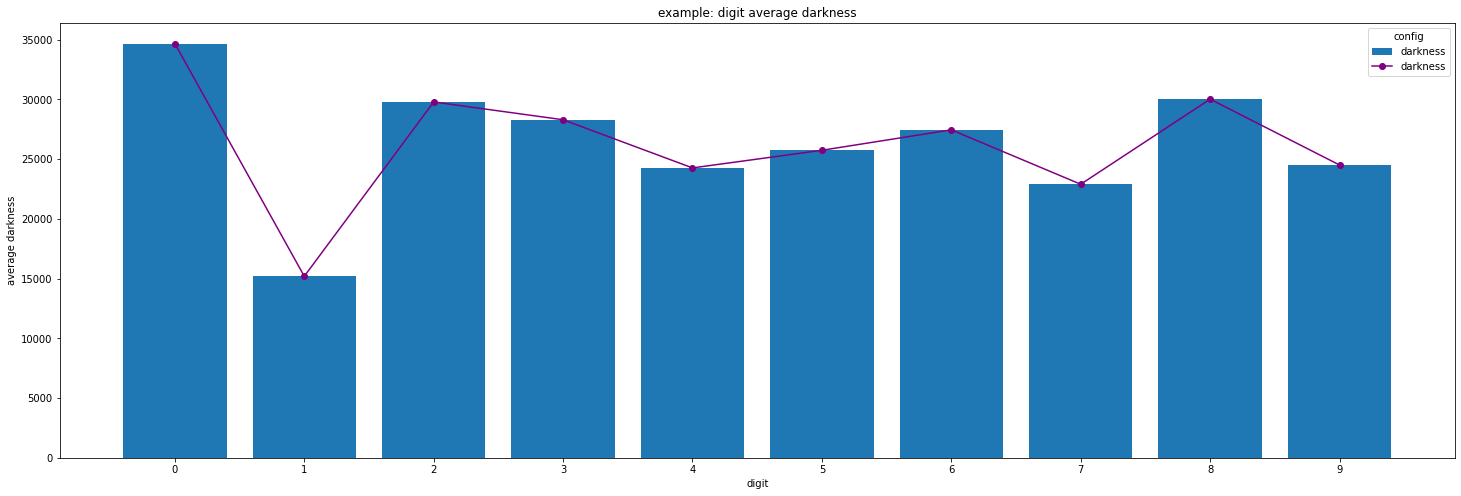

In [21]:
# use matplot lib to plot the average darkness of each digit ... 
# this is NOT part of the assignment, but it gives you some example code for working with matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 8))
digits = [f"{i}" for i in range(10)]
p1 = ax.bar(digits,darknesses, label="darkness")
p2, = ax.plot(digits,darknesses, color='purple', label="darkness", marker='o')
ax.legend(handles=[p1, p2],loc='upper right',title='config') 
ax.set_xlabel("digit")
ax.set_ylabel("average darkness")
plt.title("example: digit average darkness")
plt.show()

In [18]:
def findClosest(darkness):
  diffs = darknesses-darkness
  return np.argmin(np.abs(diffs))

In [19]:
accuracies = [0]*10
for i in range(len(X_test)):
  x = X_test[i]
  label = Y_test[i]
  darknessX = calcDarkness(x)
  predictedlabel = findClosest(darknessX)
  if 
    accuracies[label] += 1

digits = [f"{i}" for i in range(10)]


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 8))
print(digits)
ax.bar(digits,accuracies, label="accuracies (raw count)")
ax.set_xlabel("digit")
ax.set_ylabel("total correct")
plt.title("example: digit \"correctness\"")
plt.show()

SyntaxError: ignored